In [18]:
import numpy
import pandas as pd
from matplotlib import pyplot as plt

## read database

In [19]:
data = pd.read_csv('./IoT_Modbus.csv')
data

,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,31-Mar-19,12:36:55,53287,1463,33518,23014,0,normal
1,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
2,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
3,31-Mar-19,12:37:00,64661,40232,33460,44046,0,normal
4,31-Mar-19,12:37:01,64661,40232,33460,44046,0,normal
...,...,...,...,...,...,...,...,...
287189,29-Apr-19,23:59:10,22798,40857,14335,58610,0,normal
287190,29-Apr-19,23:59:22,15838,54368,63613,45660,0,normal
287191,29-Apr-19,23:59:26,28674,60221,3792,17705,0,normal
287192,29-Apr-19,23:59:32,28674,60221,3792,17705,0,normal


## ouput

In [20]:
data['label'].value_counts()

0    222855
1     64339
Name: label, dtype: int64

In [21]:
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data['hour'] = data['datetime'].dt.hour

In [22]:
data

,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type,datetime,hour
0,31-Mar-19,12:36:55,53287,1463,33518,23014,0,normal,2019-03-31 12:36:55,12
1,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal,2019-03-31 12:36:58,12
2,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal,2019-03-31 12:36:58,12
3,31-Mar-19,12:37:00,64661,40232,33460,44046,0,normal,2019-03-31 12:37:00,12
4,31-Mar-19,12:37:01,64661,40232,33460,44046,0,normal,2019-03-31 12:37:01,12
...,...,...,...,...,...,...,...,...,...,...
287189,29-Apr-19,23:59:10,22798,40857,14335,58610,0,normal,2019-04-29 23:59:10,23
287190,29-Apr-19,23:59:22,15838,54368,63613,45660,0,normal,2019-04-29 23:59:22,23
287191,29-Apr-19,23:59:26,28674,60221,3792,17705,0,normal,2019-04-29 23:59:26,23
287192,29-Apr-19,23:59:32,28674,60221,3792,17705,0,normal,2019-04-29 23:59:32,23


In [23]:
data['hour'].value_counts()

6     32393
12    22021
16    12563
21    12455
23    12084
17    12016
7     11780
19    11767
15    11546
20    11435
18    11407
9     11015
0     10954
1     10841
22    10690
8     10122
4      9961
11     9825
10     9715
2      9054
14     8950
5      8584
3      8220
13     7796
Name: hour, dtype: int64

In [55]:
label_list = []
for i in range(24):
    result = data[data['hour'] == i]['label'].value_counts()
    label_list.append([result[0],result[1]])

In [56]:
label_counts = pd.DataFrame(columns=['0','1'],data=label_list)
label_counts

,0,1
0,5832,5122
1,5940,4901
2,5218,3836
3,7754,466
4,9933,28
5,8059,525
6,32347,46
7,10915,865
8,6477,3645
9,6630,4385


<Axes: >

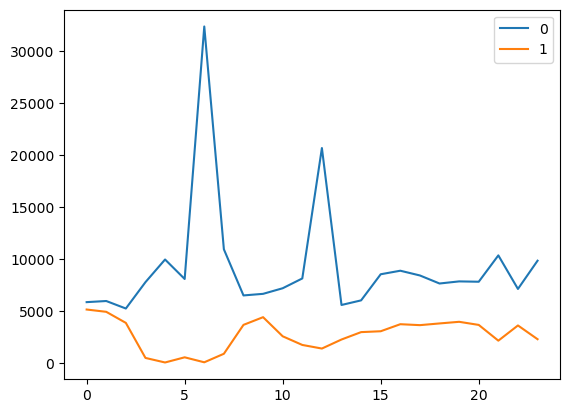

In [57]:
label_counts.plot()